# RIO-125: Classification Model - Build a Model that Classifies the Side Effects of a Drug

### By- Bhagyashri Kankekar

## Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
%matplotlib inline

## Get the data

In [3]:
df = pd.read_csv("drugeffects.csv",index_col=0)
df.head()

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects


In [4]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 0 to 3106
Data columns (total 5 columns):
urlDrugName      3107 non-null object
rating           3107 non-null int64
effectiveness    3107 non-null object
condition        3106 non-null object
sideEffects      3107 non-null object
dtypes: int64(1), object(4)
memory usage: 145.6+ KB
None
            rating
count  3107.000000
mean      7.006115
std       2.937582
min       1.000000
25%       5.000000
50%       8.000000
75%       9.000000
max      10.000000


Observe, there are no null values in the data, and also, there are no outliers in the data.

## Visualization

let's visualize to understand data even better.

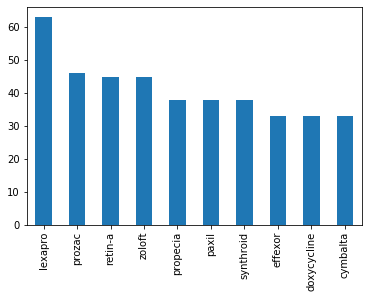

In [5]:
df['urlDrugName'].value_counts().head(10).plot(kind='bar')

This are the top 10 drugs in our data.

Text(0.5, 0, 'Ratings')

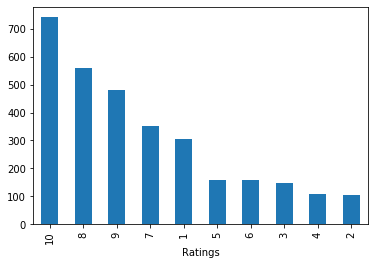

In [6]:
df['rating'].value_counts().plot(kind='bar')
plt.xlabel('Ratings')

Above plot shows drugs by their ratings(10-0). 

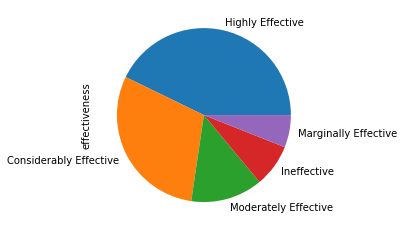

In [7]:
df['effectiveness'].value_counts().plot(kind='pie')


We can see that most of the drugs are highly effective.

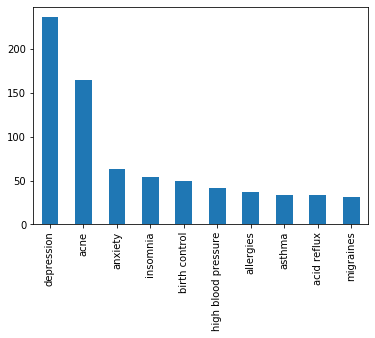

In [8]:
df['condition'].value_counts().head(10).plot(kind='bar')


Observed that depression and acne patients more than other diseases. 

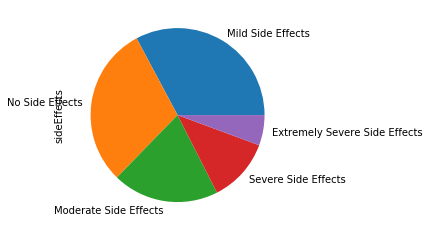

In [9]:
df['sideEffects'].value_counts().head(10).plot(kind='pie')


## Data preprocessing

Let's seperate dependant and independant variables. 

In [10]:
target = df.pop('sideEffects')
df.head()

,urlDrugName,rating,effectiveness,condition
0,enalapril,4,Highly Effective,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,birth prevention
2,ponstel,10,Highly Effective,menstrual cramps
3,prilosec,3,Marginally Effective,acid reflux
4,lyrica,2,Marginally Effective,fibromyalgia


In [11]:
# now we will convert the catagorical data to numeric.

cols=['urlDrugName', 'effectiveness', 'condition']

for x in cols:
    df[x] = pd.factorize(df[x])[0]
    
target = pd.factorize(target)[0]
df.head()

,urlDrugName,rating,effectiveness,condition
0,0,4,0,0
1,1,1,0,1
2,2,10,0,2
3,3,3,1,3
4,4,2,1,4


In [12]:
target

array([0, 1, 2, ..., 4, 0, 4], dtype=int64)

In [13]:
#scaling the data before modelling

scaler = StandardScaler()
df = scaler.fit_transform(df)

df

array([[-1.21297976, -1.02349444, -1.04689456, -0.94221638],
       [-1.20449215, -2.04490682, -1.04689456, -0.93987936],
       [-1.19600454,  1.01933033, -1.04689456, -0.93754234],
       ...,
       [ 0.35722814, -1.70443603, -0.41222112,  2.38803771],
       [ 3.03931298,  0.33838874,  0.85712577, -0.67112201],
       [ 1.16355111, -1.02349444,  1.49179921, -0.74123262]])

## Train Test Split 

In [14]:
#splitting dataset.
X_train, X_test, y_train, y_test = train_test_split(df, target)

## Support Vector Machine Classifier

In [15]:
svm_clf = SVC().fit(X_train, y_train)

svm_pred = svm_clf.predict(X_test)

C:\Users\Raviraj\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.50      0.56      0.53       265
           1       0.34      0.38      0.36        92
           2       0.57      0.61      0.59       224
           3       0.39      0.26      0.31        43
           4       0.46      0.33      0.38       153

    accuracy                           0.49       777
   macro avg       0.45      0.43      0.43       777
weighted avg       0.49      0.49      0.49       777



##### So, we can see that SVM classifier gives the accuracy of 49%.

## Random Forest

In [17]:
rf_clf = RandomForestClassifier().fit(X_train, y_train)

rf_pred = rf_clf.predict(X_test)

C:\Users\Raviraj\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.49      0.49      0.49       265
           1       0.34      0.34      0.34        92
           2       0.51      0.52      0.52       224
           3       0.37      0.44      0.40        43
           4       0.42      0.39      0.40       153

    accuracy                           0.46       777
   macro avg       0.43      0.43      0.43       777
weighted avg       0.46      0.46      0.46       777



##### We observed that accuracy of random forest is 46%

## K-Nearest Neighbor Classifier

In [24]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [49]:
accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df,target,cv=10)
    accuracy_rate.append(score.mean())

In [50]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,df,target,cv=10)
    error_rate.append(1-score.mean())

In [51]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

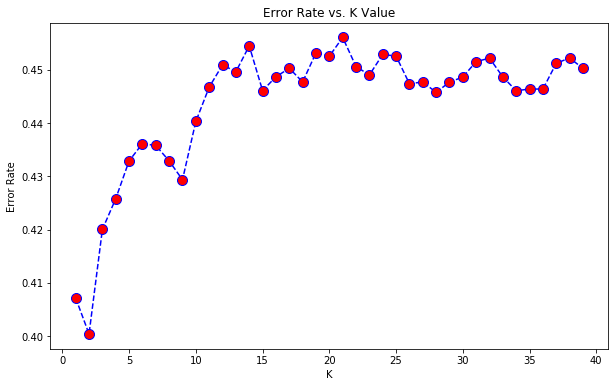

In [52]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [61]:
knn_clf = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)

knn_pred = knn_clf.predict(X_test)


In [62]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.46      0.51      0.48       265
           1       0.34      0.36      0.35        92
           2       0.50      0.50      0.50       224
           3       0.50      0.49      0.49        43
           4       0.43      0.34      0.38       153

    accuracy                           0.45       777
   macro avg       0.45      0.44      0.44       777
weighted avg       0.45      0.45      0.45       777



##### KNN gives the accuracy for dataset is 45%. Hence proved that SVM is better model for this problem.